In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
import os
os.getcwd()

'd:\\Anik\\Personal\\Python\\practise\\25thClass'

In [3]:
#Loading data
data = pd.read_csv(r'Iris.csv')
data.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.drop(columns= ['Id'] , inplace=True)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
data.columns = ['SL' , 'SW' , 'PL' , 'PW' , 'SP']#Col Renaming

In [6]:
data.info()#Check for missing val

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SL      150 non-null    float64
 1   SW      150 non-null    float64
 2   PL      150 non-null    float64
 3   PW      150 non-null    float64
 4   SP      150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
#To see total unique values of Species
data[['SP']].value_counts()

SP             
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [8]:
#Extracting data
#data.columns#To see cols name
#data.columns[[0]]#DataType Object
#data.columns[:4]
X = data[data.columns[:4]]
X

,SL,SW,PL,PW
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [9]:
#Y = data[data.columns[-1]]#Return String value
Y = data[[data.columns[-1]]]#Now its return as DataFrame
Y

,SP
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
...,...
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica


In [10]:
#Data Preprocessing
#data renaming
#data[['Species']].replace({'Iris-setosa':0} , {'Iris-versicolor': 1} , {'Iris-virginica' : 2})#but not will be update on main dataset
data
#data[['Species']] = data[['Species']].replace({'Iris-setosa':0 , 'Iris-versicolor': 1 , 'Iris-virginica' : 2})#thats why we assign it to same var

data[['SP']].value_counts()

SP             
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [11]:
#Another Way of data renaming
#Label Encoder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()#Create encoder object
#encodedY = encoder.fit_transform(Y)#to overcome this error will use ravel
encodedY = encoder.fit_transform(Y.values.ravel())#Values for convert numpy, and ravel for 1D
encodedY

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

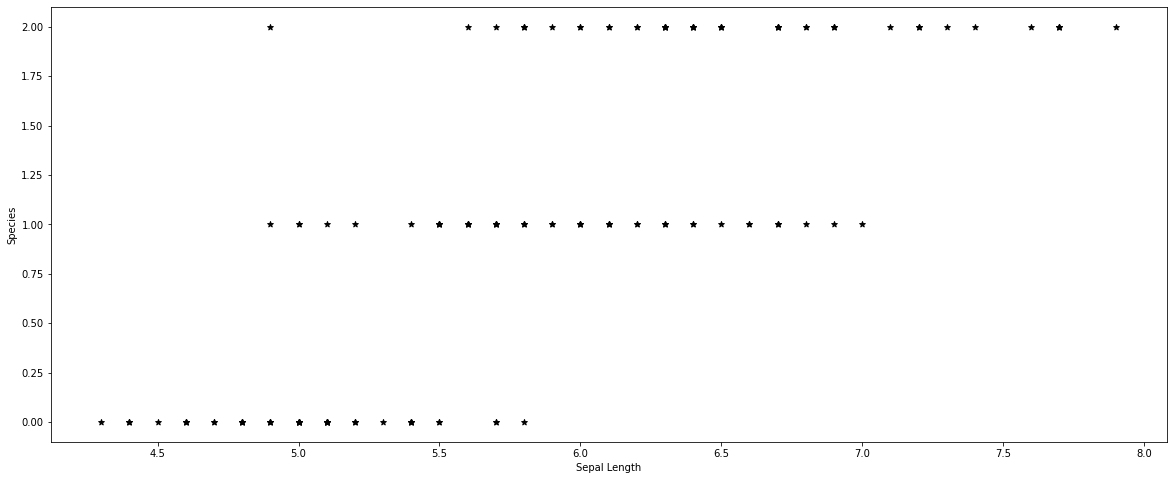

In [12]:
fig1 = plt.figure(1,figsize=(20,8))
plt.scatter(X[['SL']] , encodedY , color = 'black' , marker='*')
plt.xlabel('Sepal Length')
plt.ylabel('Species')
plt.show()

In [14]:
#Filtering
data[data['SP'] == 'Iris-setosa'][['SL']]
#data[data['SP'] == 'Iris-setosa'][['SL' , 'SP']]

,SL
0,5.1
1,4.9
2,4.7
3,4.6
4,5.0
5,5.4
6,4.6
7,5.0
8,4.4
9,4.9


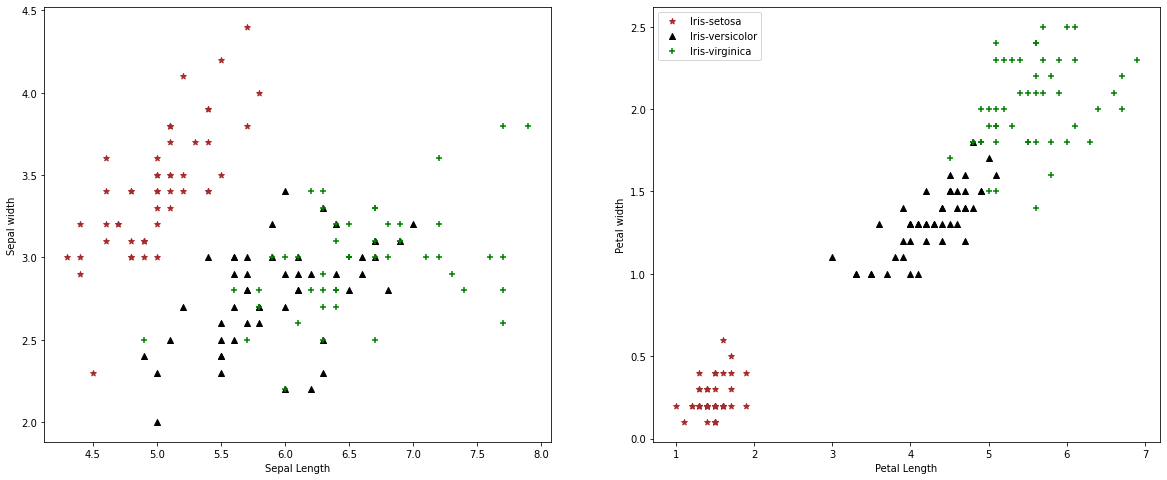

In [15]:
# Now will create Subplots
# 1 row,2 cols.it will return 1 figure and 1 axes
fig, axes = plt.subplots(1, 2, figsize=(20, 8))
axes[0].scatter(data[data['SP'] == 'Iris-setosa'][['SL']],
                data[data['SP'] == 'Iris-setosa'][['SW']], label = 'Iris-setosa' , color='brown', marker='*')
axes[0].scatter(data[data['SP'] == 'Iris-versicolor'][['SL']],
                data[data['SP'] == 'Iris-versicolor'][['SW']], label = 'Iris-versicolor' , color='black', marker='^')
axes[0].scatter(data[data['SP'] == 'Iris-virginica'][['SL']],
                data[data['SP'] == 'Iris-virginica'][['SW']], label = 'Iris-virginica' , color='green', marker='+')

axes[0].set_xlabel('Sepal Length')
axes[0].set_ylabel('Sepal width')


axes[1].scatter(data[data['SP'] == 'Iris-setosa'][['PL']],
                data[data['SP'] == 'Iris-setosa'][['PW']], label = 'Iris-setosa' , color='brown', marker='*')
axes[1].scatter(data[data['SP'] == 'Iris-versicolor'][['PL']],
                data[data['SP'] == 'Iris-versicolor'][['PW']], label = 'Iris-versicolor' , color='black', marker='^')
axes[1].scatter(data[data['SP'] == 'Iris-virginica'][['PL']],
                data[data['SP'] == 'Iris-virginica'][['PW']], label = 'Iris-virginica' , color='green', marker='+')

axes[1].set_xlabel('Petal Length')
axes[1].set_ylabel('Petal width')

plt.legend()
plt.show()


In [16]:
#Spliting Data
from sklearn.model_selection import train_test_split
xtrain , xtest , ytrain , ytest = train_test_split(X[['PL' ,'PW']] , encodedY , test_size= .2 , random_state= 42 )


In [17]:
#Modeling
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(xtrain , ytrain)
ypred = model.predict(xtest)

In [18]:
#ypred,ytest
ypred == ytest

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [19]:
from sklearn.metrics import confusion_matrix , accuracy_score
confusion_matrix(ytest , ypred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

c:\python3.10.5\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


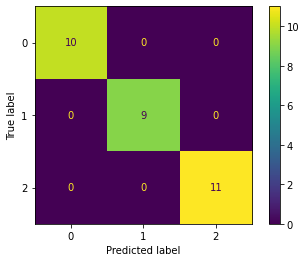

In [20]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model , xtest, ytest)#For better view of confusion metrix

In [21]:
accuracy_score(ytest,ypred)

1.0

In [22]:
print(ytest,ypred)
#Now we will convert numeric to textual
encoder.inverse_transform(ypred)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0] [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa'], dtype=object)

# Class 26 Start from here

In [23]:
#Cross validation for whole data
from sklearn.model_selection import cross_val_score
cv = cross_val_score(model , X[['PL' ,'PW']] , encodedY ,cv = 6)
cv , cv.mean()#It will provide accuracy of every fold on testing and training data & calculate average

(array([0.96, 1.  , 0.92, 0.92, 0.96, 1.  ]), 0.96)

In [24]:
#Visualization how actually model predict

#When we do perform leanear reg we just create line and done
#but for log reg we will create meshgrid for separate flower ,they will separated and decorated their boundary,devide by their area
#we can do by67 1D,but here we will not perform by 1D
#We will use 2 feature PL And PW (X and Y Axis),and create meshgrid, and see how data separate to different region

# now will create dummy matrix which matrix through data will be ploted
xmin ,xmax = X[['PL']].values.min() , X[['PL']].values.max()
ymin ,ymax = X[['PW']].values.min() , X[['PW']].values.max()
#xmin,xmax,ymin,ymax
xx , yy = np.meshgrid(np.arange(xmin , xmax , 0.1) , np.arange(ymin,ymax , 0.01)) #like linspase(but linspace generate 1D) ,but meshgrid will generate 2D paralally
#xx , xx.shape#2D shape
#Kind of pixel coloring
#When we train model we gave data not separately(we gave 2data[X[['PL' ,'PW']] ] in xtain ) ,so we will cocatinate vertically that means column wise
xtest = np.c_[xx.ravel() , yy.ravel()]#So when we concat column wise, we need to flat first
xtest , xtest.shape#2D shape
ypred = model.predict(xtest)
ypred

c:\python3.10.5\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0, 0, 0, ..., 2, 2, 2])